In [1]:
from xgboost import XGBRegressor
!pip install pandas numpy scikit-learn matplotlib xgboost seaborn joblib



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [108]:
df=pd.read_csv(r"C:\Users\cmall\OneDrive\Desktop\machine learning\Capstone-project\Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv")
df_1=pd.read_csv(r"C:\Users\cmall\OneDrive\Desktop\machine learning\Capstone-project\Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv")
df_2=pd.read_csv(r"C:\Users\cmall\OneDrive\Desktop\machine learning\Capstone-project\Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv")
df_3=pd.read_csv(r"C:\Users\cmall\OneDrive\Desktop\machine learning\Capstone-project\Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv")
df_4=pd.read_csv(r"C:\Users\cmall\OneDrive\Desktop\machine learning\Capstone-project\Resale flat prices based on registration date from Jan-2017 onwards.csv")


**_making a single csv file by merging all data sets_**

In [68]:
merge=pd.concat([df,df_1,df_2,df_3,df_4])
merge=merge.to_csv('final.csv')

NameError: name 'df' is not defined

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, classification_report, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
merge=pd.read_csv('final.csv')
merge.head()

C:\Users\cmall\AppData\Local\Temp\ipykernel_16596\969771539.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  merge=pd.read_csv('final.csv')


,Unnamed: 0,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [4]:
merge.drop(columns=['Unnamed: 0'], inplace=True)
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963856 entries, 0 to 963855
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                963856 non-null  object 
 1   town                 963856 non-null  object 
 2   flat_type            963856 non-null  object 
 3   block                963856 non-null  object 
 4   street_name          963856 non-null  object 
 5   storey_range         963856 non-null  object 
 6   floor_area_sqm       963856 non-null  float64
 7   flat_model           963856 non-null  object 
 8   lease_commence_date  963856 non-null  int64  
 9   resale_price         963856 non-null  float64
 10  remaining_lease      254806 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 80.9+ MB


**_generally the street_name and block does not affect the price of the flat so drop those columns_**

In [5]:
merge.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [6]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963856 entries, 0 to 963855
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                963856 non-null  object 
 1   town                 963856 non-null  object 
 2   flat_type            963856 non-null  object 
 3   block                963856 non-null  object 
 4   street_name          963856 non-null  object 
 5   storey_range         963856 non-null  object 
 6   floor_area_sqm       963856 non-null  float64
 7   flat_model           963856 non-null  object 
 8   lease_commence_date  963856 non-null  int64  
 9   resale_price         963856 non-null  float64
 10  remaining_lease      254806 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 80.9+ MB


### **_Lets try to find some insides  of the data_**

flat_type
1 ROOM               300000.0
2 ROOM               585000.0
3 ROOM              1568000.0
4 ROOM              1518000.0
5 ROOM              1658888.0
EXECUTIVE           1588000.0
MULTI GENERATION     760000.0
MULTI-GENERATION    1388888.0
Name: resale_price, dtype: float64


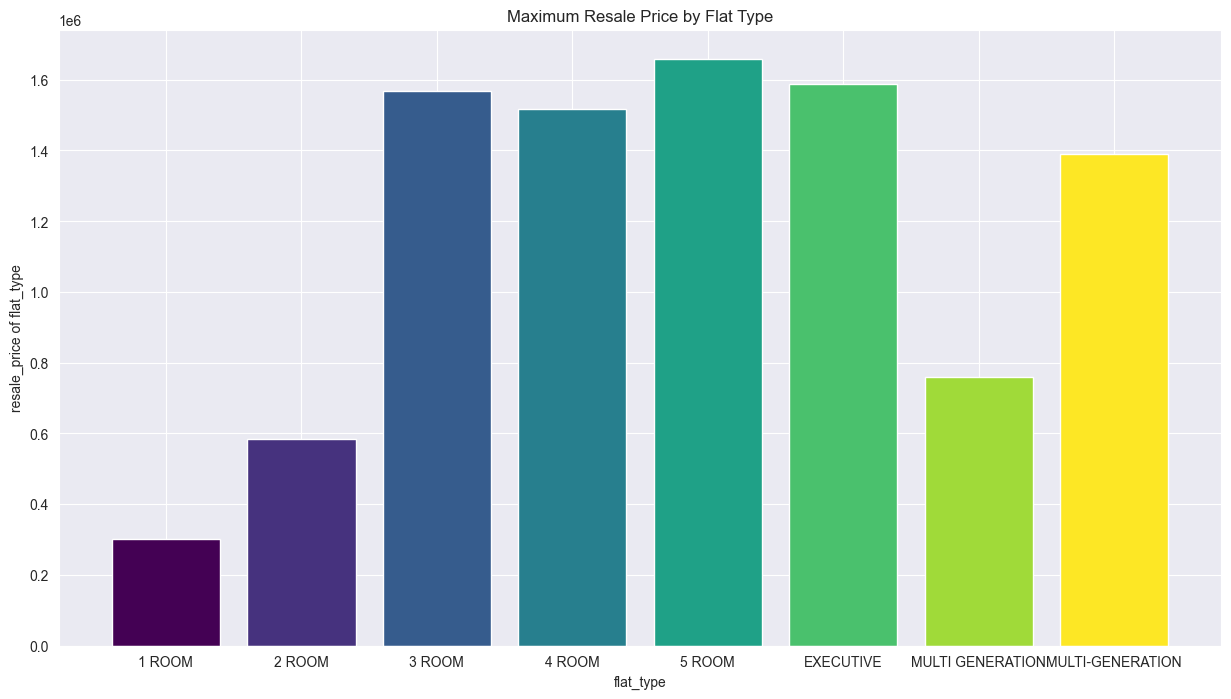

In [7]:
resale_prices=merge.groupby('flat_type')['resale_price'].max()
print(resale_prices)
colors=cm.viridis(np.linspace(0,1,len(resale_prices)))
fig,ax=plt.subplots(figsize=(15,8))
ax.bar(resale_prices.index,resale_prices.values,color=colors)
ax.set_xlabel('flat_type')
ax.set_ylabel('resale_price of flat_type')
ax.set_title('Maximum Resale Price by Flat Type')
ax.grid(True)
plt.show()

#### **_My Observations from above graph_**

**_The most costly flat_types are:_**
**------------**
**_1.5 room_**
**_2.Executive_**
**_3.3 room_**

**_The moderate costly flat_types are:_**
**------------**
**_1.4 room_**
**_2.Multi-Generation_**

**_The least and low cost flat_types are:_**
**------------**
**_1.Multi Generation_**
**_2.2 room_**
**_3.1 room_**


In [8]:
resale_price=merge.groupby('flat_model')['resale_price'].max()
print(resale_price)

flat_model
2-ROOM                     151000.0
2-room                     540000.0
3Gen                       925000.0
APARTMENT                  883000.0
Adjoined flat             1500000.0
Apartment                 1448000.0
DBSS                      1600000.0
IMPROVED                   650000.0
IMPROVED-MAISONETTE        530000.0
Improved                  1588000.0
Improved-Maisonette       1060000.0
MAISONETTE                 900000.0
MODEL A                    688000.0
MODEL A-MAISONETTE         668000.0
MULTI GENERATION           760000.0
Maisonette                1588000.0
Model A                   1338000.0
Model A-Maisonette        1305000.0
Model A2                   670000.0
Multi Generation          1388888.0
NEW GENERATION             440000.0
New Generation             908000.0
PREMIUM APARTMENT          780000.0
Premium Apartment         1485000.0
Premium Apartment Loft    1658888.0
Premium Maisonette        1208000.0
SIMPLIFIED                 395000.0
STANDARD         

**_lets convert the flat_model to lowercase_**

In [9]:
merge['flat_model']=merge['flat_model'].str.lower()
resale_price=merge.groupby('flat_model')['resale_price'].max()
print(resale_price.head())

flat_model
2-room            540000.0
3gen              925000.0
adjoined flat    1500000.0
apartment        1448000.0
dbss             1600000.0
Name: resale_price, dtype: float64


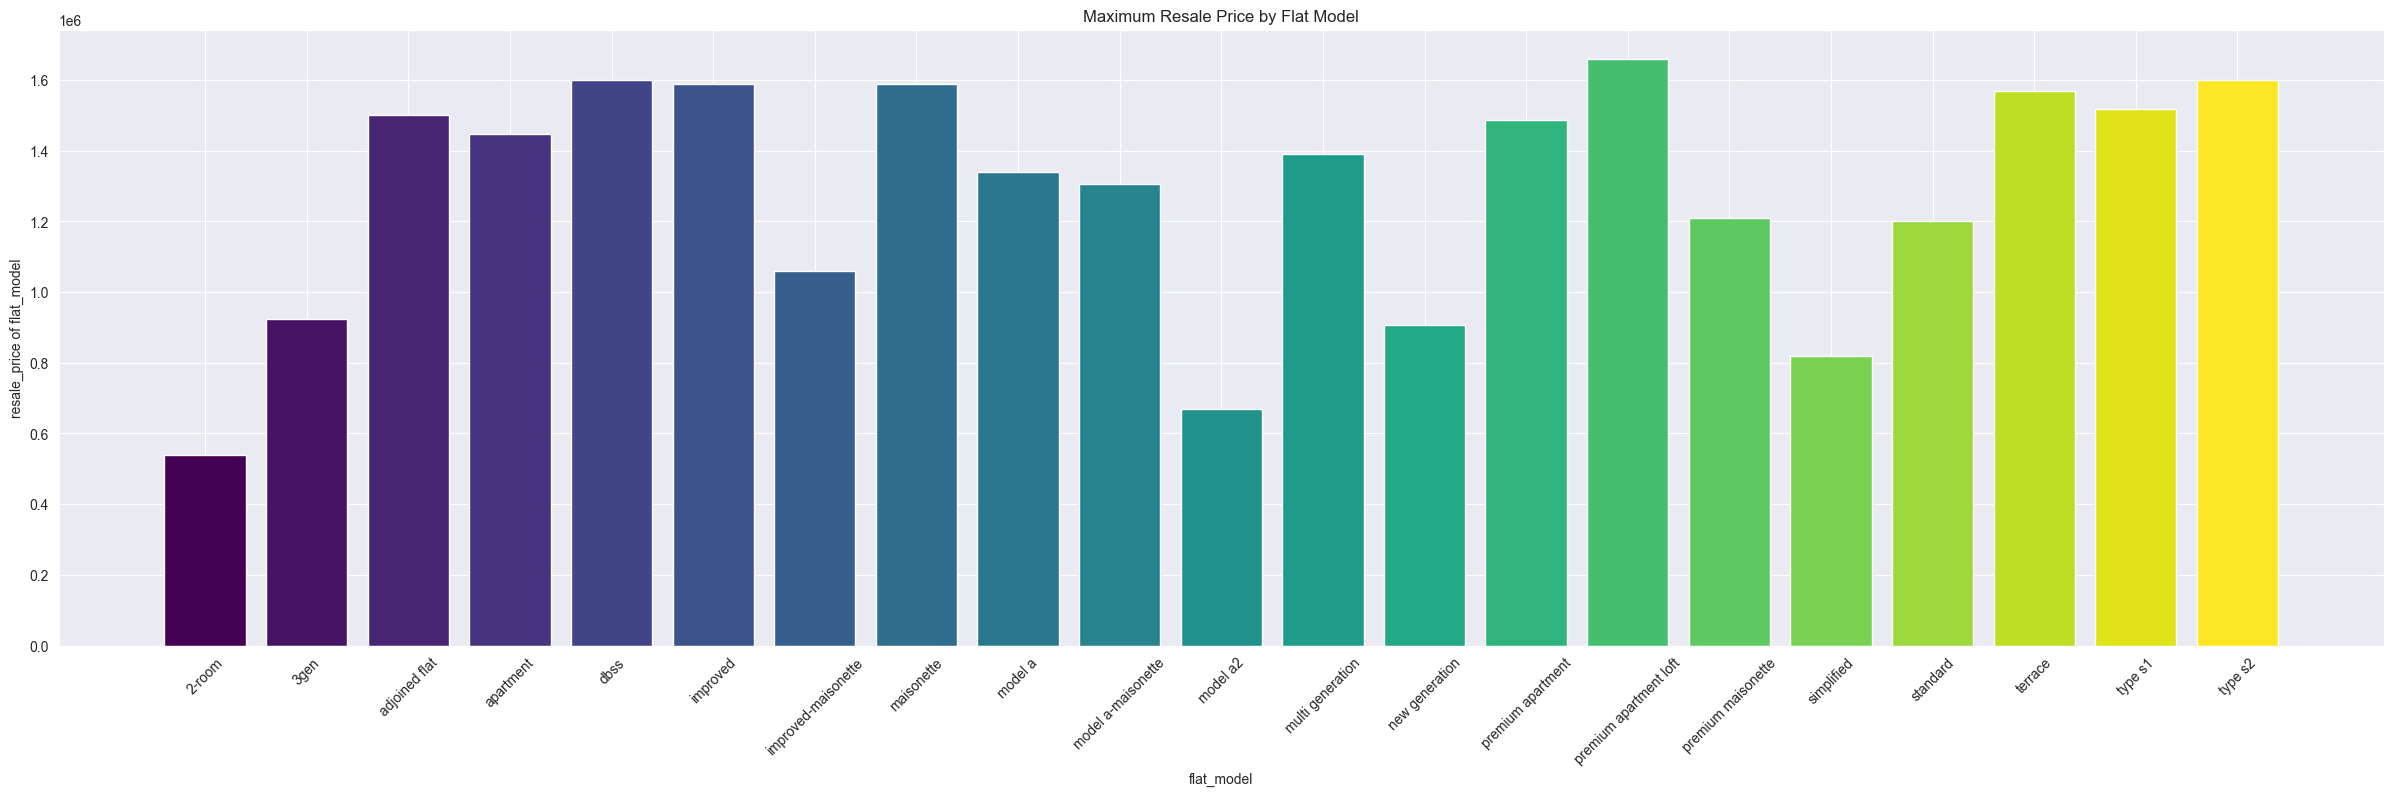

In [10]:
colors=cm.viridis(np.linspace(0,1,len(resale_price)))
fig,ax=plt.subplots(figsize=(30,8))
ax.bar(resale_price.index,resale_price.values,color=colors)
ax.set_xlabel('flat_model')
ax.set_ylabel('resale_price of flat_model')
ax.set_title('Maximum Resale Price by Flat Model')
plt.xticks(rotation=45)
plt.show()

#### **My observation**

**_The Expansive flat_model are:_**
**---------------**
**_1.premium Apartment loft_**
**_2.dbss_**
**_3.improved_**
**_4.maisonette_**
**_5.terrace_**
**_6.type2_**

**_The Moderate costly flat_model are:_**
**------------**
**_1.Apartment_**
**_2.model a_**
**_3.model a-maisonette_**
**_4.muti generation_**
**_5.premium apartment_**

**_The Low cost flat_model are:_**
**------------**
**_1.standard_**
**_2.simplified_**
**_3.2room_**
**_4.3gen_**
**_5.model a2 flat_model_**
**_etc_**

In [11]:
flat_model=pd.DataFrame(merge.groupby('flat_model')['resale_price'].max())
flat_model=flat_model.sort_values('resale_price',ascending=False)
flat_model_1=flat_model[:11]
print(flat_model.head())

                        resale_price
flat_model                          
premium apartment loft     1658888.0
type s2                    1600000.0
dbss                       1600000.0
maisonette                 1588000.0
improved                   1588000.0


#### **ploting graph  of the top10 flat_model**

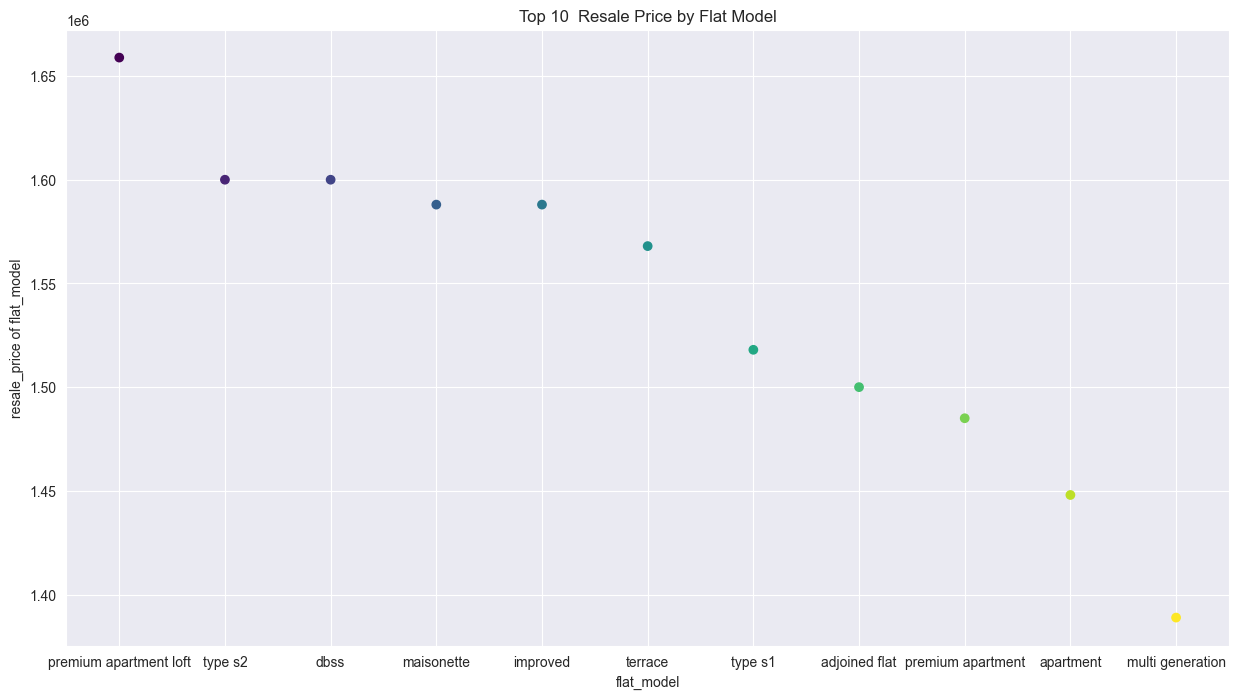

In [12]:
colors = cm.viridis(np.linspace(0, 1, len(flat_model_1)))
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(flat_model_1.index,flat_model_1.values,color=colors)
ax.set_xlabel('flat_model')
ax.set_ylabel('resale_price of flat_model')
ax.set_title('Top 10  Resale Price by Flat Model')
plt.show()

In [13]:
floor_area=pd.DataFrame(merge.groupby('floor_area_sqm')['resale_price'].max())
floor_area=floor_area.sort_values('resale_price',ascending=False)
floor_area_1=floor_area.iloc[:10]
print(floor_area_1.head())

                resale_price
floor_area_sqm              
122.0              1658888.0
105.0              1600000.0
117.0              1600000.0
107.0              1590000.0
112.0              1588000.0


In [14]:
floor_area_1.resale_price.values

array([1658888., 1600000., 1600000., 1590000., 1588000., 1588000.,
       1588000., 1568000., 1568000., 1550000.])

**_Ploting the scatter graph with floor_area_sqm  and resale_price_**

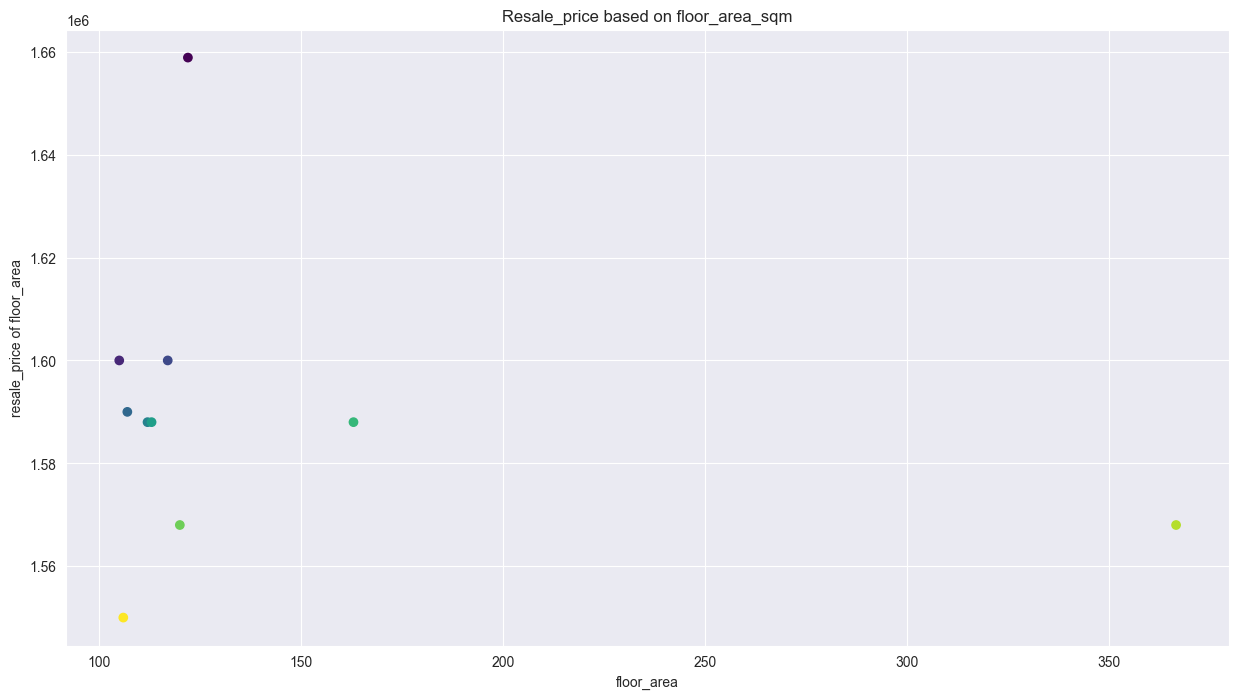

In [15]:
colors=cm.viridis(np.linspace(0,1,len(floor_area_1)))
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(floor_area_1.resale_price.index,floor_area_1.values,color=colors)
ax.set_xlabel('floor_area')
ax.set_ylabel('resale_price of floor_area')
ax.set_title('Resale_price based on floor_area_sqm')
plt.show()

**_Lets plot the scatter with floor_area_sqm ,resale_price and along with flat_model_**

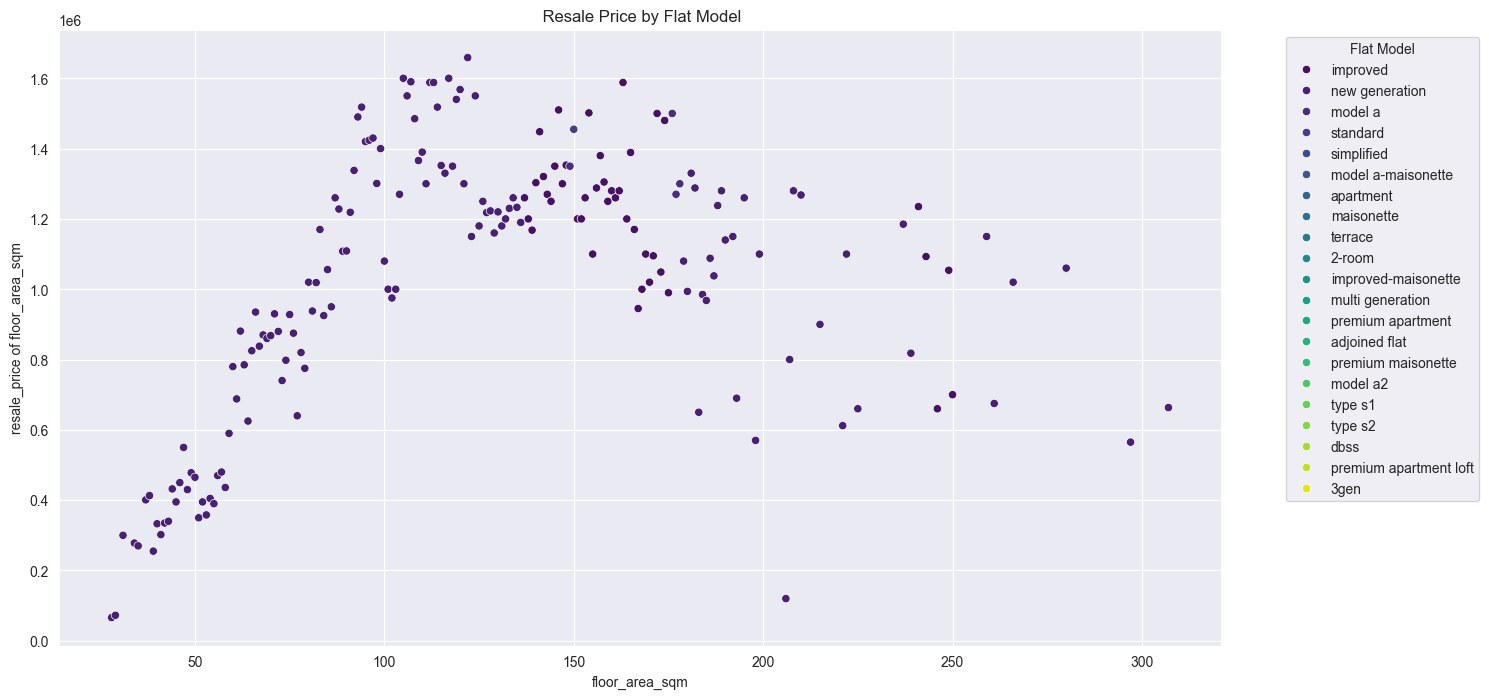

In [16]:
fig,ax=plt.subplots(figsize=(15,8))
sns.scatterplot(floor_area,x='floor_area_sqm',y='resale_price',hue=merge['flat_model'],palette='viridis')
plt.xlabel('floor_area_sqm')
plt.ylabel('resale_price of floor_area_sqm')
plt.title(' Resale Price by Flat Model')
plt.legend(title='Flat Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**_Lets plot the scatter graph with floor_area_sqm with flat_type_**

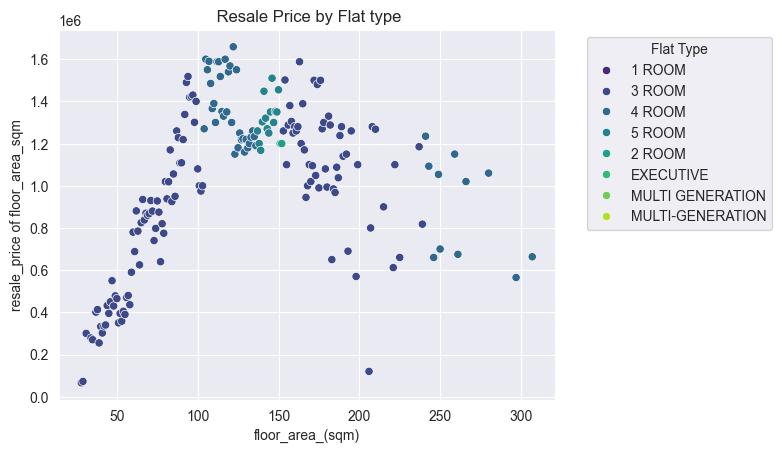

In [17]:
flat_floor=pd.DataFrame(merge.groupby('floor_area_sqm')['resale_price'].max())
sns.scatterplot(flat_floor,x='floor_area_sqm',y='resale_price',hue=merge['flat_type'],palette='viridis')
plt.xlabel('floor_area_(sqm)')
plt.ylabel('resale_price of floor_area_sqm')
plt.title(' Resale Price by Flat type')
plt.legend(title='Flat Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

####  **lets find out the outlier in the data**

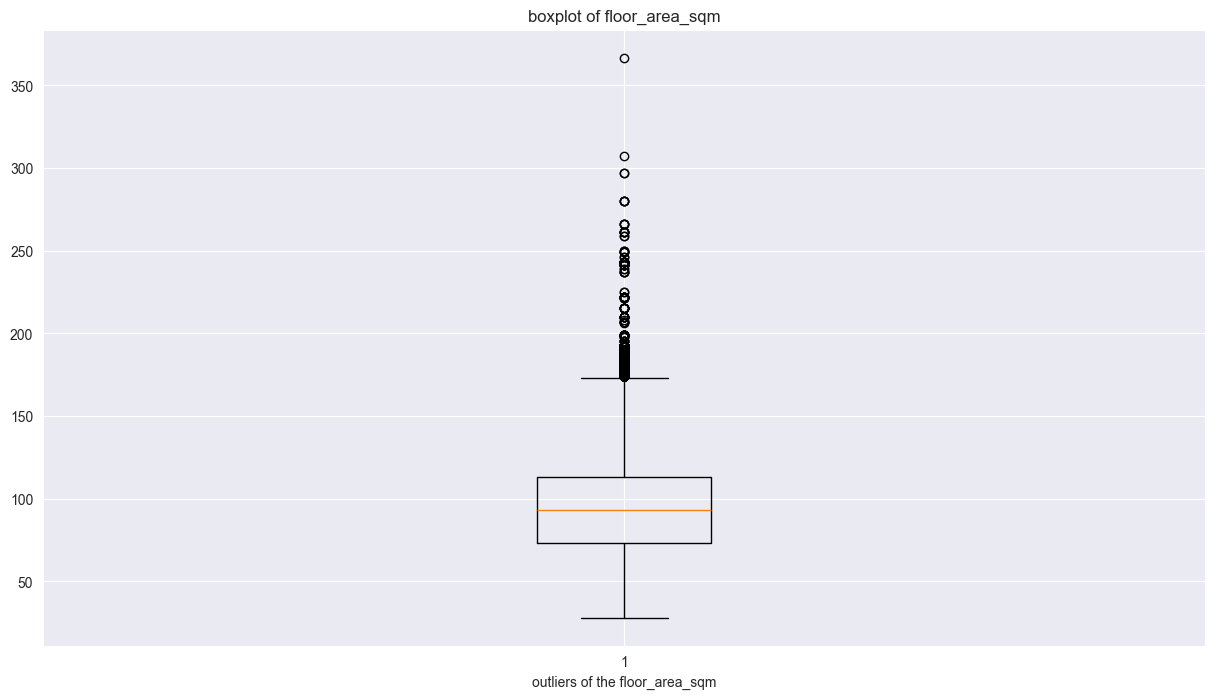

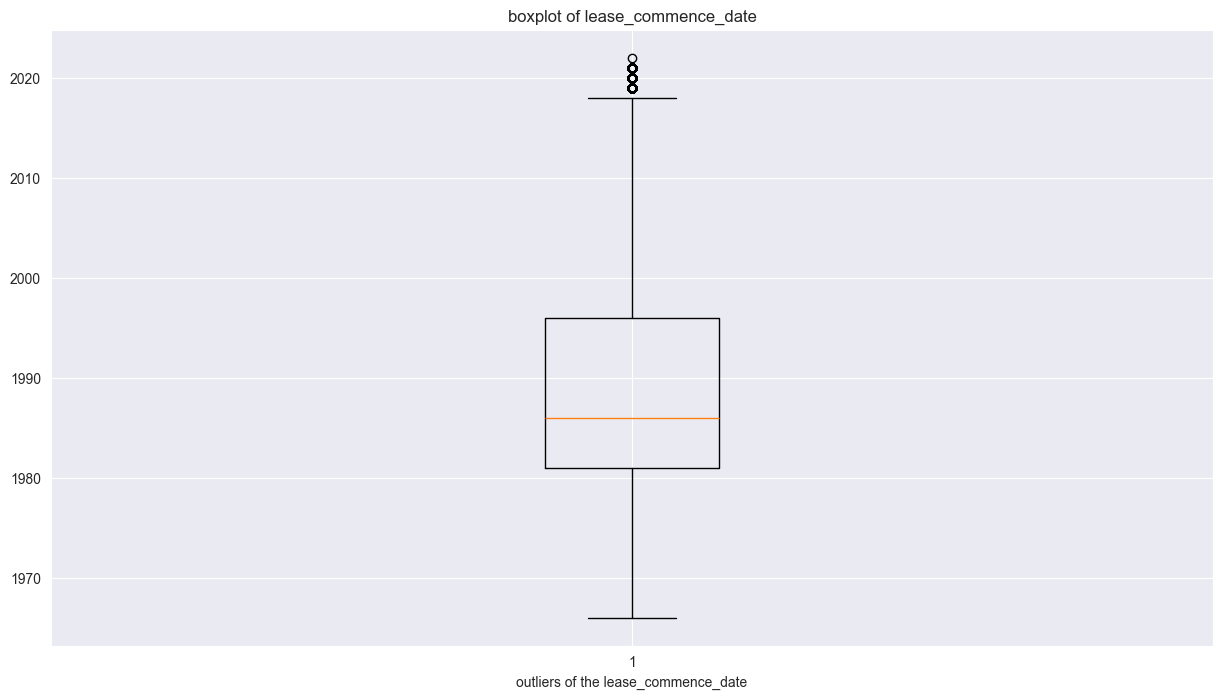

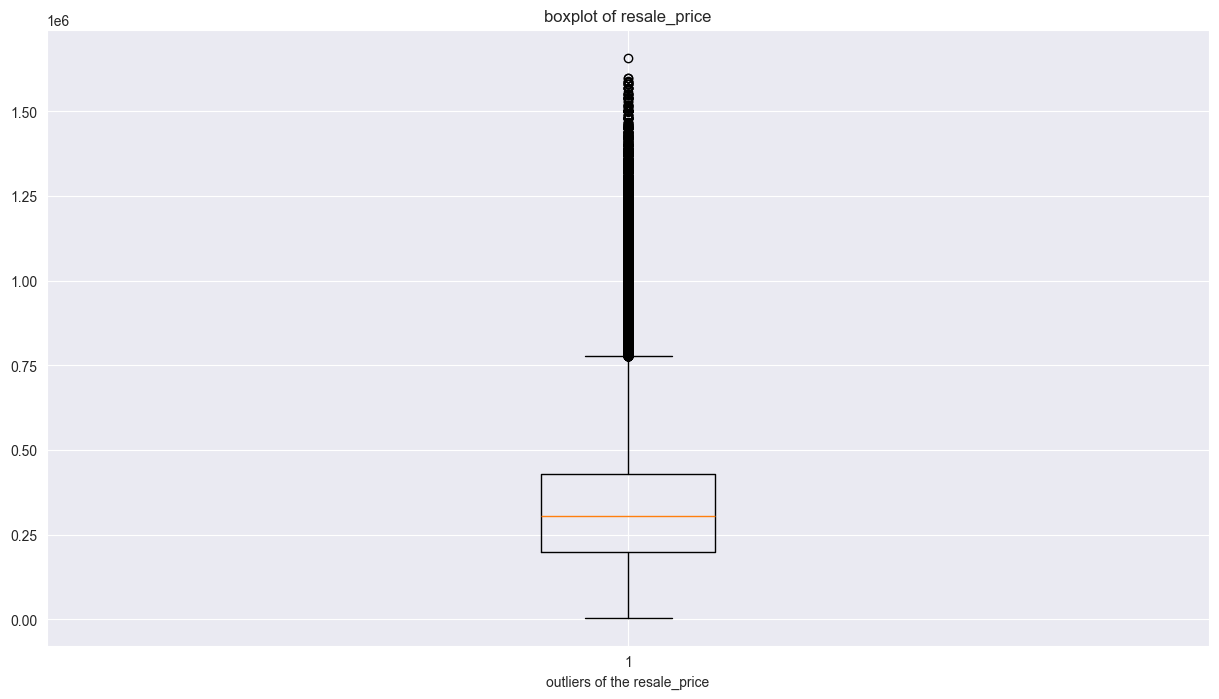

In [18]:
for col in merge.columns:
    if pd.api.types.is_numeric_dtype(merge[col]):
       fig,ax=plt.subplots(figsize=(15,8))
       ax.boxplot(merge[col].dropna())
       ax.set_title(f'boxplot of {col}')
       ax.set_xlabel(f'outliers of the {col}')
       plt.show()

#### **_Feature Engineering_**

##### **_Creating, transforming, or selecting the most useful variables (features) from raw data to help a machine learning model make better predictions._**


_**In short:
Good features = smarter models.**_

In [19]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963856 entries, 0 to 963855
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                963856 non-null  object 
 1   town                 963856 non-null  object 
 2   flat_type            963856 non-null  object 
 3   block                963856 non-null  object 
 4   street_name          963856 non-null  object 
 5   storey_range         963856 non-null  object 
 6   floor_area_sqm       963856 non-null  float64
 7   flat_model           963856 non-null  object 
 8   lease_commence_date  963856 non-null  int64  
 9   resale_price         963856 non-null  float64
 10  remaining_lease      254806 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 80.9+ MB


**_First we need to handle the Categorical Data_**

**_Encoding = converting categorical data into numeric format so models can use it_**

In [20]:
merge['month'].values

array(['1990-01', '1990-01', '1990-01', ..., '2025-09', '2025-05',
       '2025-07'], shape=(963856,), dtype=object)

In [21]:
import pickle
merge['month'] = pd.to_datetime(merge['month'], errors='coerce')
merge['year'] = merge['month'].dt.year
merge['month_num'] = merge['month'].dt.month
merge['year_month'] = (merge['year'] + merge['month_num']/12).round(2)
merge.drop(columns=['month_num','month','year'], axis=1, inplace=True)

merge.head()


,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,improved,1977,9000.0,NaN,1990.08
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,improved,1977,6000.0,NaN,1990.08
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,improved,1977,8000.0,NaN,1990.08
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,improved,1977,6000.0,NaN,1990.08
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,new generation,1976,47200.0,NaN,1990.08


In [22]:
merge[['lower_range','upper_range']]=merge['storey_range'].str.extract(r'(\d+)\s*TO\s*(\d+)').astype(int)
merge['storey_range']=((merge['upper_range']+merge['lower_range'])/2).astype(int)
merge.drop(columns=['lower_range','upper_range'],axis=1, inplace=True)
merge.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,11,31.0,improved,1977,9000.0,NaN,1990.08
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,5,31.0,improved,1977,6000.0,NaN,1990.08
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,11,31.0,improved,1977,8000.0,NaN,1990.08
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,8,31.0,improved,1977,6000.0,NaN,1990.08
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,5,73.0,new generation,1976,47200.0,NaN,1990.08


In [23]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963856 entries, 0 to 963855
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 963856 non-null  object 
 1   flat_type            963856 non-null  object 
 2   block                963856 non-null  object 
 3   street_name          963856 non-null  object 
 4   storey_range         963856 non-null  int64  
 5   floor_area_sqm       963856 non-null  float64
 6   flat_model           963856 non-null  object 
 7   lease_commence_date  963856 non-null  int64  
 8   resale_price         963856 non-null  float64
 9   remaining_lease      254806 non-null  object 
 10  year_month           963856 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 80.9+ MB


In [24]:
merge[['town','flat_model','flat_type']].head()

,town,flat_model,flat_type
0,ANG MO KIO,improved,1 ROOM
1,ANG MO KIO,improved,1 ROOM
2,ANG MO KIO,improved,1 ROOM
3,ANG MO KIO,improved,1 ROOM
4,ANG MO KIO,new generation,3 ROOM


**the fully categorical data will be encode with label encoder but if u have numerical value in the data extract the values then encode_**

In [25]:
col=['town','flat_model','flat_type']
for cols in col[:]:
    print(cols,merge[cols].unique())

town ['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT TIMAH'
 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG' 'HOUGANG'
 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'QUEENSTOWN' 'SENGKANG' 'SERANGOON' 'TAMPINES' 'TOA PAYOH' 'WOODLANDS'
 'YISHUN' 'LIM CHU KANG' 'SEMBAWANG' 'BUKIT PANJANG' 'PASIR RIS' 'PUNGGOL']
flat_model ['improved' 'new generation' 'model a' 'standard' 'simplified'
 'model a-maisonette' 'apartment' 'maisonette' 'terrace' '2-room'
 'improved-maisonette' 'multi generation' 'premium apartment'
 'adjoined flat' 'premium maisonette' 'model a2' 'type s1' 'type s2'
 'dbss' 'premium apartment loft' '3gen']
flat_type ['1 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' 'EXECUTIVE'
 'MULTI GENERATION' 'MULTI-GENERATION']


In [26]:
merge.isnull().sum()
merge['flat_type']=merge['flat_type'].str.lower()
merge['flat_type'].unique()

array(['1 room', '3 room', '4 room', '5 room', '2 room', 'executive',
       'multi generation', 'multi-generation'], dtype=object)

In [27]:

import pickle
town_encoder=LabelEncoder()
flat_type_encoder=LabelEncoder()
flat_model_encoder=LabelEncoder()
block_encoder=LabelEncoder()
street_name_encoder=LabelEncoder()

pickle.dump(town_encoder,open('town_encoder.pkl','wb'))
pickle.dump(flat_type_encoder,open('flat_type_encoder.pkl','wb'))
pickle.dump(block_encoder,open('block_encoder.pkl','wb'))
pickle.dump(street_name_encoder,open('street_name_encoder.pkl','wb'))

merge['town']=town_encoder.fit_transform(merge['town'])
merge['flat_type']=flat_type_encoder.fit_transform(merge['flat_type'])
merge['block']=block_encoder.fit_transform(merge['block'])
merge['flat_model']=flat_model_encoder.fit_transform(merge['flat_model'])
merge['street_name']=street_name_encoder.fit_transform(merge['street_name'])
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963856 entries, 0 to 963855
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 963856 non-null  int64  
 1   flat_type            963856 non-null  int64  
 2   block                963856 non-null  int64  
 3   street_name          963856 non-null  int64  
 4   storey_range         963856 non-null  int64  
 5   floor_area_sqm       963856 non-null  float64
 6   flat_model           963856 non-null  int64  
 7   lease_commence_date  963856 non-null  int64  
 8   resale_price         963856 non-null  float64
 9   remaining_lease      254806 non-null  object 
 10  year_month           963856 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 80.9+ MB



### **_Handling of missing values_**

**Final remaining_lease is categorical and also it contains missing values  before we need to fill the missing values then we can encode**

In [28]:
merge['remaining_lease'].unique()

array([nan, 70.0, 65.0, 64.0, 63.0, 62.0, 69.0, 60.0, 61.0, 86.0, 77.0,
       80.0, 90.0, 87.0, 66.0, 58.0, 94.0, 71.0, 68.0, 84.0, 73.0, 79.0,
       76.0, 72.0, 82.0, 74.0, 67.0, 88.0, 81.0, 89.0, 53.0, 54.0, 55.0,
       57.0, 93.0, 83.0, 85.0, 92.0, 91.0, 59.0, 95.0, 52.0, 51.0, 56.0,
       75.0, 96.0, 78.0, 50.0, 97.0, 49.0, 48.0, '61 years 04 months',
       '60 years 07 months', '62 years 05 months', '62 years 01 month',
       '63 years', '61 years 06 months', '58 years 04 months',
       '59 years 08 months', '59 years 06 months', '60 years',
       '62 years 08 months', '61 years', '60 years 10 months',
       '59 years 03 months', '61 years 05 months', '60 years 04 months',
       '62 years', '60 years 03 months', '63 years 09 months',
       '61 years 01 month', '61 years 10 months', '58 years 06 months',
       '59 years 04 months', '62 years 11 months', '60 years 08 months',
       '93 years 08 months', '93 years 07 months', '60 years 01 month',
       '94 years 08 mont

**_Extracting year and month in single line_**
**merge[['remaining_year','remaining_month']]=merge['remaining_lease'].str.extract(r'(\d+)\s*years\s(\d+)\s*month[s]?')**

In [29]:
merge[['remaining_year', 'remaining_month']] = merge['remaining_lease'].astype(str).str.extract(
    r'(?:(\d+)\s*year[s]?)?\s*(?:(\d+)\s*month[s]?)?'
)
#converting the object to numerical
merge['remaining_year'] = pd.to_numeric(merge['remaining_year'], errors='coerce')
merge['remaining_month'] = pd.to_numeric(merge['remaining_month'], errors='coerce')
#creating single column
merge['remaining_lease'] = merge['remaining_year'] + (merge['remaining_month'] / 12)
#filling only the missing values
merge['remaining_lease'] = merge['remaining_lease'].fillna(99 - (2025 - merge['lease_commence_date']))
#converting object to numerical
merge['remaining_lease'] = merge['remaining_lease'].round(1)  # keep decimals, like 62.5 years
merge.head()


,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year_month,remaining_year,remaining_month
0,0,0,833,14,11,31.0,5,1977,9000.0,51.0,1990.08,NaN,NaN
1,0,0,833,14,5,31.0,5,1977,6000.0,51.0,1990.08,NaN,NaN
2,0,0,833,14,11,31.0,5,1977,8000.0,51.0,1990.08,NaN,NaN
3,0,0,833,14,8,31.0,5,1977,6000.0,51.0,1990.08,NaN,NaN
4,0,2,450,14,5,73.0,12,1976,47200.0,50.0,1990.08,NaN,NaN


In [30]:
merge.drop(columns=['remaining_year','remaining_month'],axis=1,inplace=True)

In [31]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963856 entries, 0 to 963855
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 963856 non-null  int64  
 1   flat_type            963856 non-null  int64  
 2   block                963856 non-null  int64  
 3   street_name          963856 non-null  int64  
 4   storey_range         963856 non-null  int64  
 5   floor_area_sqm       963856 non-null  float64
 6   flat_model           963856 non-null  int64  
 7   lease_commence_date  963856 non-null  int64  
 8   resale_price         963856 non-null  float64
 9   remaining_lease      963856 non-null  float64
 10  year_month           963856 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 80.9 MB


In [32]:
'''merge.drop(columns='remaining_lease',axis=1,inplace=True)'''

"merge.drop(columns='remaining_lease',axis=1,inplace=True)"

**Lets find the relation by using heatmap**

<Axes: >

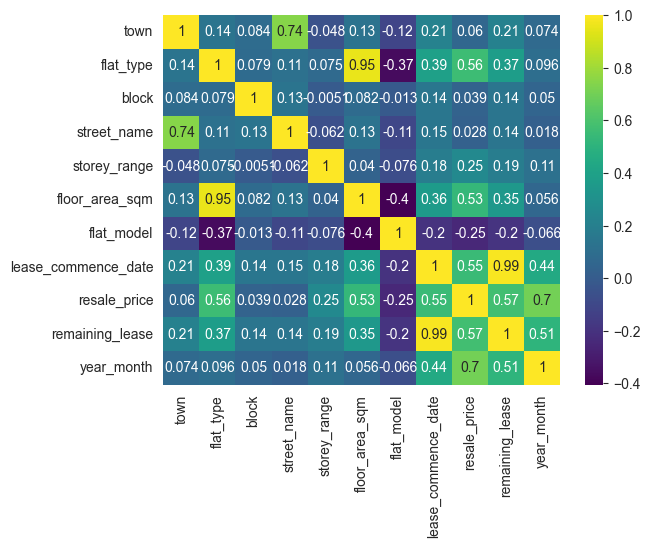

In [33]:
sns.heatmap(merge.corr(),annot=True,cmap='viridis')

**now trying the RandomForestRegressor to train the data**

In [34]:
x=merge.drop(columns=['resale_price'])
y=merge['resale_price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

rand_model=RandomForestRegressor(n_estimators=100,random_state=42)
rand_model.fit(x_train,y_train)
y_pred=rand_model.predict(x_test)

print(rand_model.score(x_test,y_test))
print(rand_model.score(x_train,y_train))


print('mse:',mean_squared_error(y_test,y_pred))
print('r2:',r2_score(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))


0.9854441765089097
0.9978291684861376
mse: 484137247.4254769
r2: 0.9854441765089097
RMSE: 22003.119038569894


In [36]:
x.columns

Index(['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'year_month'],
      dtype='object')

In [37]:
sample=merge.iloc[[100]]
print(sample)
sample=sample.drop(columns=['resale_price'])
y_pred=rand_model.predict(sample)
y_pred

     town  flat_type  block  street_name  storey_range  floor_area_sqm  \
100     0          2    189           19             8            68.0   

     flat_model  lease_commence_date  resale_price  remaining_lease  \
100          12                 1981       52500.0             55.0   

     year_month  
100     1990.08  


array([50123.])

In [38]:
feature_df = pd.DataFrame({
    'features': x.columns,
    'importance': rand_model.feature_importances_
})

# Sort by importance
feature_df = feature_df.sort_values(by='importance', ascending=False)
print(feature_df)

              features  importance
9           year_month    0.559697
5       floor_area_sqm    0.238247
1            flat_type    0.055137
0                 town    0.042059
4         storey_range    0.028749
7  lease_commence_date    0.025628
3          street_name    0.019691
2                block    0.013744
6           flat_model    0.009508
8      remaining_lease    0.007541


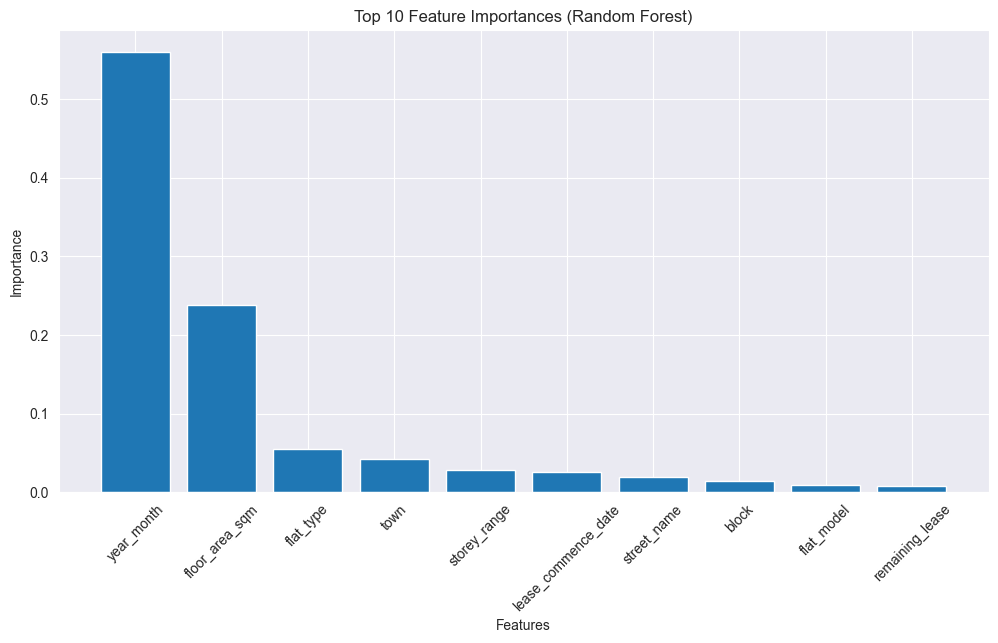

In [39]:
feature=rand_model.feature_importances_
feature_df = pd.DataFrame({
    'features': x.columns,
    'importance': feature
})

# Sort by importance
feature_df = feature_df.sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(12,6))
plt.bar(feature_df['features'], feature_df['importance'])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

In [115]:
x=merge.drop(columns=['remaining_lease','flat_model','block','resale_price'])
y=merge['resale_price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

rand_model_1=RandomForestRegressor(n_estimators=100,random_state=42)
rand_model_1.fit(x_train,y_train)
y_pred=rand_model_1.predict(x_test)

print(rand_model_1.score(x_test,y_test))
print(rand_model_1.score(x_train,y_train))


print('mse:',mean_squared_error(y_test,y_pred))
print('r2:',r2_score(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

0.9842220754158781
0.9973465405356654
mse: 524785216.2345308
r2: 0.9842220754158781
RMSE: 22908.19102929192


In [116]:
from  joblib import dump
sample=merge.iloc[[100]]
print(sample)
sample=sample.drop(columns=['remaining_lease','flat_model','block','resale_price'])
y_pred=rand_model_1.predict(sample)
dump(rand_model_1,'RandomForestRegressor.joblib')
y_pred

     town  flat_type  block  street_name  storey_range  floor_area_sqm  \
100     0          2    189           19             8            68.0   

     flat_model  lease_commence_date  resale_price  remaining_lease  \
100          12                 1981       52500.0             55.0   

     year_month  
100     1990.08  


array([51550.])

In [38]:
print(sample)

     town  flat_type  street_name  storey_range  floor_area_sqm  \
100     0          2           19             8            68.0   

     lease_commence_date  year_month  
100                 1981     1990.08  


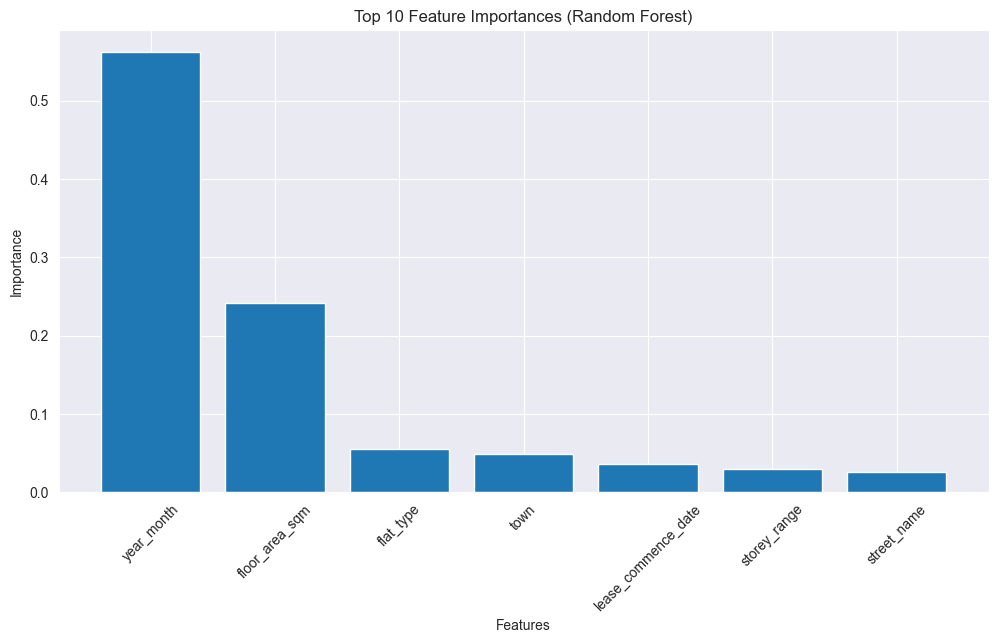

In [43]:
feature=rand_model_1.feature_importances_
feature_df = pd.DataFrame({
    'features': x.columns,
    'importance': feature
})

# Sort by importance
feature_df = feature_df.sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(12,6))
plt.bar(feature_df['features'][:10], feature_df['importance'][:10])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()



 ### **_lets train model with Random_grid_**

In [ ]:
x=merge.drop(columns=['remaining_lease','flat_model','block','resale_price'])
y=merge['resale_price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
param_distributions = {
    'n_estimators': [ 300,500],
    'max_depth': [20, 30],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [ 2, 4],
    'max_features': ['auto', 'sqrt', 0.8],  # auto = all features, sqrt = subset
    'bootstrap': [True, False]
}

# Randomized search
rand_for_model= RandomizedSearchCV(
    estimator=rand_model,
    param_distributions=param_distributions,
    n_iter=20,              # increase for more exhaustive search
    cv=5,
    scoring='r2',
    verbose=2,
    random_state=42,
    n_jobs=-1
)
rand_for_model.fit(x_train,y_train)
y_pred=rand_for_model.predict(x_test)

print('best_estimators:',rand_for_model.best_estimator_)
print("best score:",rand_for_model.best_score_)
print("best params:",rand_for_model.best_params_)

print('mse:',mean_squared_error(y_test,y_pred))
print('r2',r2_score(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))



Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [42]:
sample=merge.iloc[[100]]
print(sample)
sample=sample.drop(columns=['remaining_lease','flat_model','block','resale_price'])
y_pred=rand_for_model.predict(sample)
y_pred

     town  flat_type  block  street_name  storey_range  floor_area_sqm  \
100     0          2    189           19             8            68.0   

     flat_model  lease_commence_date  resale_price  remaining_lease  \
100          12                 1981       52500.0             55.0   

     year_month  
100     1990.08  


array([46384.36086971])

In [118]:
x=merge.drop(columns=['remaining_lease','resale_price','flat_model'])
y=merge['resale_price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

rand_model_1=RandomForestRegressor(n_estimators=100,random_state=42)
rand_model_1.fit(x_train,y_train)
y_pred=rand_model_1.predict(x_test)

print(rand_model_1.score(x_test,y_test))
print(rand_model_1.score(x_train,y_train))

print('mse:',mean_squared_error(y_test,y_pred))
print('r2:',r2_score(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))


KeyboardInterrupt: 

In [45]:
sample=merge.iloc[[100]]
print(sample)
sample=sample.drop(columns=['remaining_lease','flat_model','resale_price'])
y_pred=rand_model_1.predict(sample)
y_pred

     town  flat_type  block  street_name  storey_range  floor_area_sqm  \
100     0          2    189           19             8            68.0   

     flat_model  lease_commence_date  resale_price  remaining_lease  \
100          12                 1981       52500.0             55.0   

     year_month  
100     1990.08  


array([50484.])

In [122]:
x=merge.drop(columns='resale_price')
y=merge['resale_price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
xgb_model=xgb.XGBRegressor(n_estimators=100,random_state=42)
xgb_model.fit(x_train,y_train)
y_pred=xgb_model.predict(x_test)

print(xgb_model.score(x_test, y_test))
print(xgb_model.score(x_train, y_train))

print('mse:', mean_squared_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))



0.9805875848783344
0.9812758547650224
mse: 645671007.8022436
r2: 0.9805875848783344
RMSE: 25410.05721761058


In [124]:
sample=merge.iloc[[100]]
print(sample)
sample=sample.drop(columns='resale_price')
y_pred=xgb_model.predict(sample)
y_pred

     town  flat_type  block  street_name  storey_range  floor_area_sqm  \
100     0          2    189           19             8            68.0   

     flat_model  lease_commence_date  resale_price  remaining_lease  \
100          12                 1981       52500.0             55.0   

     year_month  
100     1990.08  


array([43817.42], dtype=float32)

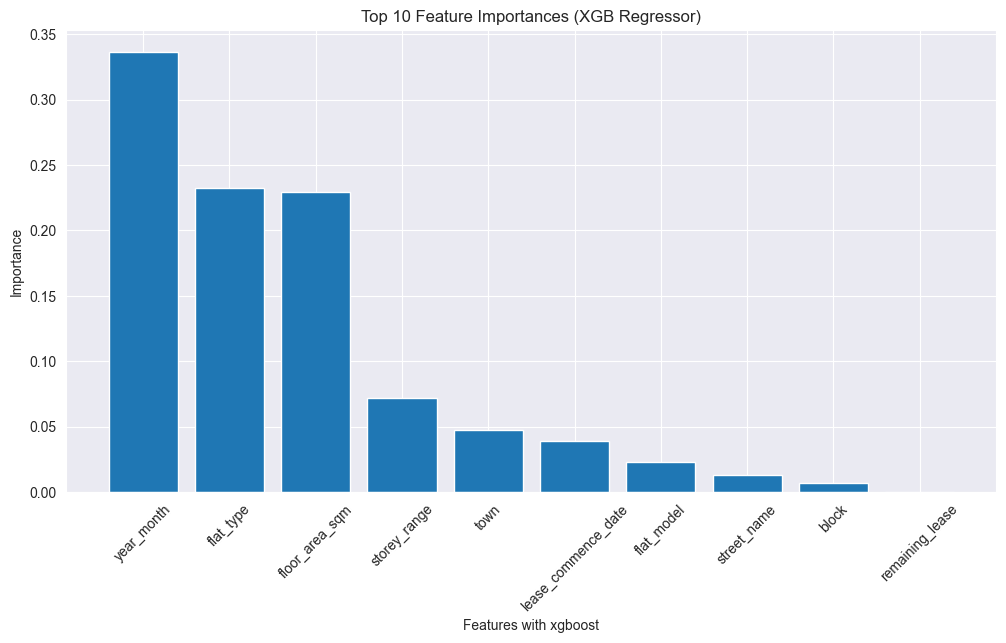

In [132]:
feature_df = feature_df.sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(12,6))
plt.bar(feature_df['features'][:10], feature_df['importance'][:10])
plt.xticks(rotation=45)
plt.xlabel('Features with xgboost')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances (XGB Regressor)')
plt.show()


In [145]:
x=merge.drop(columns=['resale_price','remaining_lease'])
y=merge['resale_price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
xgb_model=xgb.XGBRegressor(n_estimators=100,random_state=42)
xgb_model.fit(x_train,y_train)
y_pred=xgb_model.predict(x_test)

print(xgb_model.score(x_test, y_test))
print(xgb_model.score(x_train, y_train))

print('mse:', mean_squared_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


0.9805875848783344
0.9812758547650224
mse: 645671007.8022436
r2: 0.9805875848783344
RMSE: 25410.05721761058


In [147]:
sample=merge.iloc[[100]]
print(sample)
sample=sample.drop(columns=['resale_price','remaining_lease'])
y_pred=xgb_model.predict(sample)
y_pred

     town  flat_type  block  street_name  storey_range  floor_area_sqm  \
100     0          2    189           19             8            68.0   

     flat_model  lease_commence_date  resale_price  remaining_lease  \
100          12                 1981       52500.0             55.0   

     year_month  
100     1990.08  


array([43817.42], dtype=float32)

In [153]:

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

x=merge.drop(columns=['resale_price','remaining_lease'])
y=merge['resale_price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# ✅ Define model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # ✅ correct objective
    random_state=42,
    n_jobs=-1
)

# ✅ Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0]
}

# ✅ Grid Search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=2,
    n_jobs=-1,
    error_score='raise'  # show full error if something goes wrong
)

print("🚀 Starting Grid Search...")
grid_search.fit(x_train, y_train)

print("\n✅ Best Parameters:")
print(grid_search.best_params_)

best_xgb = grid_search.best_estimator_

# ✅ Evaluation
y_pred = best_xgb.predict(x_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\n📊 Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:,.2f}")

🚀 Starting Grid Search...
Fitting 3 folds for each of 54 candidates, totalling 162 fits

✅ Best Parameters:
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}

📊 Model Performance:
R² Score: 0.9851
Mean Absolute Error: 15,618.65


In [154]:
sample=merge.iloc[[100]]
print(sample)
sample=sample.drop(columns=['resale_price','remaining_lease'])
y_pred=best_xgb.predict(sample)
y_pred

     town  flat_type  block  street_name  storey_range  floor_area_sqm  \
100     0          2    189           19             8            68.0   

     flat_model  lease_commence_date  resale_price  remaining_lease  \
100          12                 1981       52500.0             55.0   

     year_month  
100     1990.08  


array([45408.3], dtype=float32)

In [155]:
!pip install tensorflow

  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached wrapt-2.0.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached grpcio-1.76.0-cp313-cp313-win_amd64.whl.metadata (3.8 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached h5py-3.15.1-cp313-cp313-win_amd64.whl.metadata (3.1 kB)
  Using cached ml_dtypes-0.5.3-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached markdown-3.9-py3-none-any.whl.metadata (5.1 kB)
  Using cache


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [172]:
from tensorflow import keras
from tensorflow import keras
x=merge.drop(columns=['resale_price','remaining_lease'])
y=merge['resale_price']

# Convert to numeric and fill missing
x = x.apply(pd.to_numeric, errors='coerce').fillna(0)
y = pd.to_numeric(y, errors='coerce').fillna(0)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


# Target scaling (normalize to millions)
y_train = y_train / 1e6
y_test = y_test / 1e6


# Define model
model = keras.Sequential([
    keras.layers.Input(shape=(x.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='linear')  # ✅ regression output
])

# Compile
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)
# Train
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f"✅ Test MAE: {test_mae:.2f}")



Epoch 1/50
19278/19278 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 0.0038 - mae: 0.0419 - val_loss: 0.0024 - val_mae: 0.0327
Epoch 2/50
19278/19278 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - loss: 0.0021 - mae: 0.0305 - val_loss: 0.0019 - val_mae: 0.0303
Epoch 3/50
19278/19278 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - loss: 0.0017 - mae: 0.0278 - val_loss: 0.0017 - val_mae: 0.0279
Epoch 4/50
19278/19278 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 0.0015 - mae: 0.0263 - val_loss: 0.0014 - val_mae: 0.0254
Epoch 5/50
19278/19278 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 0.0014 - mae: 0.0253 - val_loss: 0.0013 - val_mae: 0.0245
Epoch 6/50
19278/19278 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 0.0013 - mae: 0.0246 - val_loss: 0.0012 - val_mae: 0.0248
Epoch 7/50
19278/19278 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - loss: 0.0012 - mae: 0.0241 - val_loss: 0.0013 - val_mae: 0.0251
Epoch 8/50
19278/19278 ━━━━━━━━━━━━━━━━━━━━ 89s 3ms/step - loss: 0.0012 - mae: 0.0237 - val_loss: 0.0011 - val_mae: 0.0232
Epoch 9/50
19278

In [177]:
sample=merge.iloc[[100]]
print(sample)
sample=sample.drop(columns=['resale_price','remaining_lease'])
sample=scaler.transform(sample)
y_pred=model.predict(sample)[0][0]
y_pred=y_pred*1e6

     town  flat_type  block  street_name  storey_range  floor_area_sqm  \
100     0          2    189           19             8            68.0   

     flat_model  lease_commence_date  resale_price  remaining_lease  \
100          12                 1981       52500.0             55.0   

     year_month  
100     1990.08  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [178]:
y_pred


np.float32(40382.953)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import random
import joblib

x=merge.drop(columns=['resale_price','remaining_lease'])
y = np.log1p(merge['resale_price'])

# Convert to numeric and fill missing
x = x.apply(pd.to_numeric, errors='coerce').fillna(0)
y = pd.to_numeric(y, errors='coerce').fillna(0)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


# Target scaling (normalize to millions)
#y_train = y_train / 1e6
#y_test = y_test / 1e6
# Set Seeds for Reproducibility
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Build improved model
model = keras.Sequential([
    layers.Input(shape=(x_train.shape[1],)),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')  # Regression output
])

# Compile
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mae']
)

# Train with early stopping
callback = keras.callbacks.EarlyStopping(
    patience=15, restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=32,
    callbacks=[callback],
    verbose=1
)

y_pred_all = model.predict(x_test).flatten() * 1e6
errors = np.abs(y_pred_all - y_test * 1e6)
print(f"📊 Average Absolute Error: {errors.mean():,.0f} SGD")
# Evaluate
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f"✅ Test MAE: {test_mae*1e6:,.0f} SGD")

model.save("hdb_price_model.h5")
joblib.dump(scaler, "scaler.pkl")


Epoch 1/300
19278/19278 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 0.6256 - mae: 0.3990 - val_loss: 0.0335 - val_mae: 0.1385
Epoch 2/300
19278/19278 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - loss: 0.0354 - mae: 0.1444 - val_loss: 0.0254 - val_mae: 0.1139
Epoch 3/300
19278/19278 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 0.0304 - mae: 0.1335 - val_loss: 0.0235 - val_mae: 0.1121
Epoch 4/300
19278/19278 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 0.0283 - mae: 0.1284 - val_loss: 0.0219 - val_mae: 0.1076
Epoch 5/300
19278/19278 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 0.0268 - mae: 0.1248 - val_loss: 0.0197 - val_mae: 0.1016
Epoch 6/300
19278/19278 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 0.0258 - mae: 0.1222 - val_loss: 0.0194 - val_mae: 0.1008
Epoch 7/300
19278/19278 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 0.0251 - mae: 0.1203 - val_loss: 0.0200 - val_mae: 0.0999
Epoch 8/300
19278/19278 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 0.0247 - mae: 0.1194 - val_loss: 0.0174 - val_mae: 0.0957
Epoch 9/

In [203]:
  y_pred=model.predict(x_test)
y_pred=y_pred*1e6

6025/6025 ━━━━━━━━━━━━━━━━━━━━ 3s 416us/step


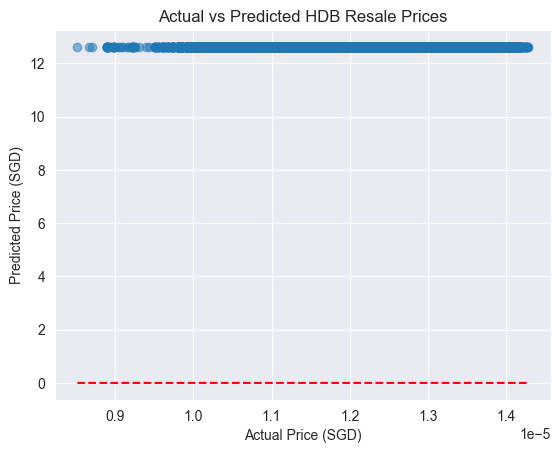

In [204]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price (SGD)")
plt.ylabel("Predicted Price (SGD)")
plt.title("Actual vs Predicted HDB Resale Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [205]:
sample=merge.iloc[[100]]
print(sample)
sample=sample.drop(columns=['resale_price','remaining_lease'])
sample=scaler.transform(sample)
y_pred=model.predict(sample)[0][0]
y_pred=y_pred*1e6

     town  flat_type  block  street_name  storey_range  floor_area_sqm  \
100     0          2    189           19             8            68.0   

     flat_model  lease_commence_date  resale_price  remaining_lease  \
100          12                 1981       52500.0             55.0   

     year_month  
100     1990.08  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [206]:
y_train.head()

908634    0.000013
406936    0.000013
637087    0.000013
725598    0.000013
156782    0.000013
Name: resale_price, dtype: float64

In [207]:
y_pred

np.float32(12.614275)